#                            WINE REVIEW DATA ANALYSIS AND VISUALIZATION
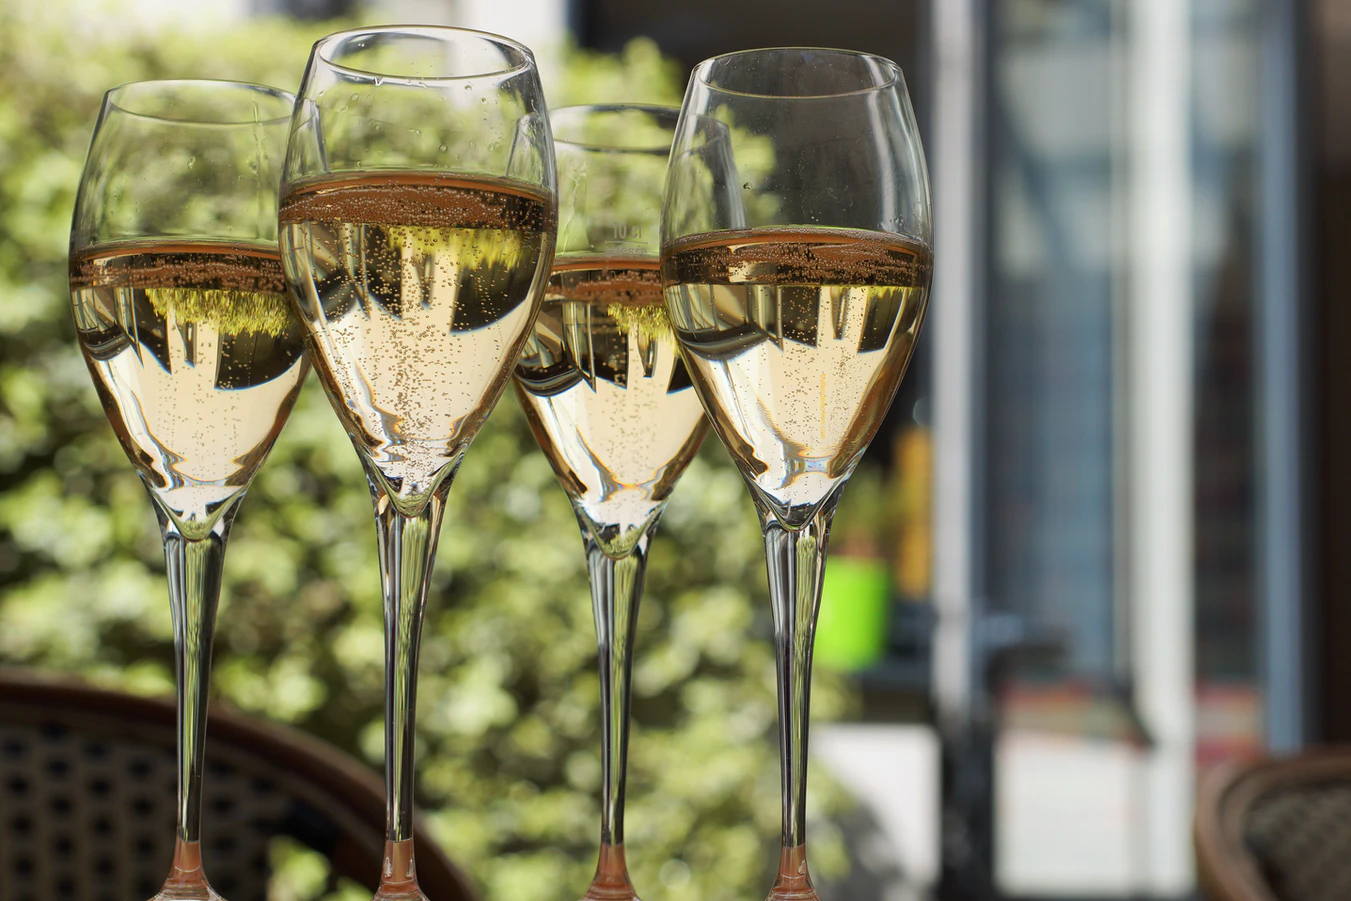

# Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from wordcloud import WordCloud,STOPWORDS, ImageColorGenerator
import squarify as sq
import matplotlib.colors
from PIL import Image
import requests


# Load and read the data

In [ ]:
df = pd.read_csv('../input/wine-reviews/winemag-data-130k-v2.csv',index_col = 0)


# Inspect the Dataset

In [ ]:
# examine first 20 rows
df.head(20)

In [ ]:
# Check data types 
df.info()

# Handling Missing Values
Calculate the percent of missing values

In [ ]:
df.isna().sum()/df.shape[0]*100

# Visualize Missing value


In [ ]:
msno.bar(df, color = sns.color_palette('RdBu'))

designation,region_1, region_2, taster_name, taster_twitter_handle columns has most of the missing values.we can safely drop the missing values from country and price column since the percent of missing values  is mimimal. We will leave rest of the column with missing values.

# Drop missing values from country and price column

In [ ]:
reviews = df.dropna(how = 'any',subset = ['country','price'])
reviews

In [ ]:
#confirm missing values has been dropped
reviews[['country','price']].isna().sum()

# Fill NAN with Unknown
	

In [ ]:
reviews.fillna('Unknown', inplace = True)
reviews


# Drop Columns
Drop taster_twitter_handle column. This column does not add value to analysis and visualization

In [ ]:
reviews.drop(['taster_twitter_handle'],axis = 1,inplace = True)
reviews
 


# Analyze the DataFrame

In [ ]:
#Lets values counts on points
reviews['points'].value_counts()

Most wines are of 88 points

In [ ]:
# Price of a wine

reviews['price'].describe()

The most expensive wine we have on a dataset is 3300 and cheapest one is 4

In [ ]:
# how many varieties of wine we have
reviews['variety'].nunique()

We have 692 varieties of wine

In [ ]:
# how often the country appears in a dataset
reviews['country'].value_counts()

United States appears most followed by France and Italy

In [ ]:
#What are the minimum and maximum prices for each variety of wine?

top_varieties = reviews.groupby('variety')['price'].agg([min,max]).sort_values(by= 'max' ,ascending = False).reset_index()
top_varieties


# Data Visualization
points count distribution

In [ ]:
plt.figure(figsize = (15,10))
ax= sns.countplot(x = 'points',data = reviews,color = 'pink')
plt.title('Points Count',fontsize=20)
plt.xlabel("Points")


It looks like a normal distribution.Most of the wines fall between 84 to 92 points

#  Distribution of Wine Price

In [ ]:
plt.figure(figsize = (12,8))
ax = sns.boxplot(x = reviews['price'],orient = 'v')
plt.title('Price Distribution',fontsize = 20)
plt.ylabel('Price',fontsize = 20)

Most wine are below 500. There is also a wine that cost more than 3000 dollars

#  Distribution of price for wines that cost less than 200 dollars

In [ ]:
below200 = reviews[reviews['price']< 200]['price']
plt.figure(figsize = (12,8))
ax = sns.distplot(below200,rug = True)
plt.title('Wine price below 200',fontsize=25)



Most wines are priced less than 100

# Top ten wine producing countries

In [ ]:
reviews['country'].value_counts()[:10].plot(kind='bar',color = 'magenta',figsize=(10,10))
plt.title("Top Ten Wine Producing Countries",fontsize=25)
plt.xlabel('Country' ,fontsize = 20)


# Tree Map of Top Countries

In [ ]:
top10 = reviews['country'].value_counts()[:10]

plt.figure(figsize = (12,8))
cmap = matplotlib.cm.Oranges
norm = matplotlib.colors.Normalize(vmin=0, vmax=15)
colors = [cmap(norm(value)) for value in range(10)]
np.random.shuffle(colors)

sq.plot(sizes =top10, label=top10.index, color = colors)
plt.title('Top Ten Countries',fontsize = 20)

Surprisingly Italy is behind US and France as biggest wine producers

#  Does expensive wines have high points

In [ ]:
plt.figure(figsize = (15,10))
ax = sns.scatterplot(x = 'price',y = 'points',data = reviews, alpha = 0.6, color = 'green')
plt.title('Points and Price Comparision',fontsize=25)

There does not seem to be any strong relationship between points and price. But, before making this conclusion let us plot same graph with a filtered data.


In [ ]:
below200 = reviews[reviews['price']< 200].sample(500)

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = 'price',y = 'points',data = below200, alpha = 0.6, color = 'purple')
plt.title('Wine price vs points- Below $200',fontsize =25)
plt.xlabel('Price', fontsize = 25)
plt.ylabel('Points', fontsize = 25)


This plot shows us that price and points are weekly correlated. The first plot was overplotted so we could not see these trends. To visualize the actual trend we had to take only few sample from the actual data

# Expensive Wines by Country- Top 20

In [ ]:
#Expensive wines by country top 20
exp_wine = reviews.groupby('country')['price'].max().sort_values(ascending = False)[:20].reset_index()

plt.figure(figsize= (10,12))
ax = sns.barplot('country', 'price',data = exp_wine,dodge = False,palette ='ocean')
plt.title('Most Expensive Wine by Country- Top 20',fontsize = 25)
plt.xlabel('Country', fontsize = 25)
plt.ylabel('Price', fontsize = 25)
plt.xticks(rotation = 90,size = 12)
plt.yticks(size = 15)




# Top 20 varieties wine per price


In [ ]:
plt.figure(figsize = (12,8))
ax = sns.barplot(x = 'max',y = 'variety',data = top_varieties[:20],hue = 'max',dodge = False, palette = 'RdPu')
plt.ylabel('Variety',fontsize = 25)
plt.xlabel('Price',fontsize = 25)
plt.title('Top variety wine(by price)- Top 20', fontsize = 20)

           
    

# Origin of wine(by province)- Top 20

In [ ]:
province = reviews['province'].value_counts()[:20]

sns.set_style('darkgrid')
plt.figure(figsize=(14,15))
ax = sns.countplot(x ='province',data = reviews.loc[(reviews['province'].isin(province.index.values))],palette ='CMRmap',order = province.index)
plt.xticks(rotation = 90,size = 12)
plt.yticks(size = 12)
plt.xlabel('Province',fontsize = 25)
plt.title('Province of Wine Origin- Top 20',fontsize =25)
plt.ylabel('Number Counts', fontsize = 25)







# Word Cloud

In [ ]:
stopwords = set(STOPWORDS)

wordcloud = WordCloud(background_color = "white",stopwords = stopwords,max_words = 300,max_font_size = 200,
                     random_state = 42,).generate("".join(reviews['description'].astype(str)))

print(wordcloud)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Description',fontsize=25)

In [ ]:
stopwords = set(STOPWORDS)

variety =  " ".join(review for review in reviews['variety'])

wordcloud = WordCloud(background_color = "white",stopwords = stopwords,max_words = 300,max_font_size = 200,
                     random_state = 42,).generate(variety)

print(wordcloud)
plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Word Cloud of Variety',fontsize=25)

# USA Description Word Cloud Generation

In [ ]:
stopwords = set(STOPWORDS)

US = reviews[reviews['country']== 'US']


wordcloud = WordCloud(background_color = "white",stopwords = stopwords,max_words = 500,max_font_size = 200,
                     random_state = 42,).generate("".join(US['description'].astype(str)))

plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('USA - Word Cloud of Description',fontsize=20)

# Italy- Description Word Cloud genaration

In [ ]:
stopwords = set(STOPWORDS)

Italy = reviews[reviews['country']== 'Italy']

wordcloud = WordCloud(background_color = "white",stopwords = stopwords,max_words = 500,max_font_size = 200,
                     random_state = 42,).generate("".join(Italy['description'].astype(str)))

plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Italy - Word Cloud of Description',fontsize=20)

# France Description Word Cloud Generation

In [ ]:
stopwords = set(STOPWORDS)

France = reviews[reviews['country']== 'France']
France

wordcloud = WordCloud(background_color = "white",stopwords = stopwords,max_words = 300,max_font_size = 200,
                     random_state = 42,).generate("".join(France['description'].astype(str)))

plt.figure(figsize = (15,15))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('France - Word Cloud of Description',fontsize=20)